In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image

import cv2
import numpy as np
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [2]:
import constants

# Helper functions
def load_image(infilename):
    data = mpimg.imread(infilename)
    return data

def img_crop(im, w, h):
    list_patches = []
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    is_2d = len(im.shape) < 3
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            if is_2d:
                im_patch = im[j:j+w, i:i+h]
            else:
                im_patch = im[j:j+w, i:i+h, :]
            list_patches.append(im_patch)
    return list_patches

def create_windows(im, window_size):
    list_patches = []
    is_2d = len(im.shape) < 3
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    padSize = (window_size-constants.IMG_PATCH_SIZE)//2
    padded = pad_image(im,padSize)
    print(padded.shape)
    for i in range(padSize,imgheight+padSize,constants.IMG_PATCH_SIZE):
        for j in range(padSize,imgwidth+padSize,constants.IMG_PATCH_SIZE):
            print(i,j)
            if is_2d:
                im_patch = padded[j-padSize:j+constants.IMG_PATCH_SIZE+padSize, i-padSize:i+constants.IMG_PATCH_SIZE+padSize]
            else:
                im_patch = padded[j-padSize:j+constants.IMG_PATCH_SIZE+padSize, i-padSize:i+constants.IMG_PATCH_SIZE+padSize, :]
            list_patches.append(im_patch)
    return list_patches

In [3]:
# Loaded a set of images
root_dir = "../dataset/training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = len(files)
print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]
print(imgs[0][2])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]
print(files[0])

X_train = imgs
Y_train = gt_imgs

Loading 100 images
[[0.19215687 0.2509804  0.15294118]
 [0.21568628 0.27058825 0.1764706 ]
 [0.1764706  0.23921569 0.14901961]
 ...
 [0.11372549 0.10196079 0.08235294]
 [0.10196079 0.09411765 0.08235294]
 [0.00392157 0.         0.        ]]
Loading 100 images
satImage_054.png


(456, 456, 3)
28 28
28 44
28 60
28 76
28 92
28 108
28 124
28 140
28 156
28 172
28 188
28 204
28 220
28 236
28 252
28 268
28 284
28 300
28 316
28 332
28 348
28 364
28 380
28 396
28 412
44 28
44 44
44 60
44 76
44 92
44 108
44 124
44 140
44 156
44 172
44 188
44 204
44 220
44 236
44 252
44 268
44 284
44 300
44 316
44 332
44 348
44 364
44 380
44 396
44 412
60 28
60 44
60 60
60 76
60 92
60 108
60 124
60 140
60 156
60 172
60 188
60 204
60 220
60 236
60 252
60 268
60 284
60 300
60 316
60 332
60 348
60 364
60 380
60 396
60 412
76 28
76 44
76 60
76 76
76 92
76 108
76 124
76 140
76 156
76 172
76 188
76 204
76 220
76 236
76 252
76 268
76 284
76 300
76 316
76 332
76 348
76 364
76 380
76 396
76 412
92 28
92 44
92 60
92 76
92 92
92 108
92 124
92 140
92 156
92 172
92 188
92 204
92 220
92 236
92 252
92 268
92 284
92 300
92 316
92 332
92 348
92 364
92 380
92 396
92 412
108 28
108 44
108 60
108 76
108 92
108 108
108 124
108 140
108 156
108 172
108 188
108 204
108 220
108 236
108 252
108 268
108 284
108 3

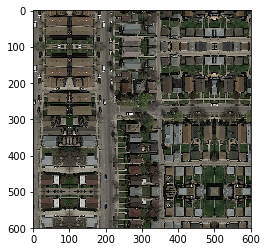

In [4]:
#pad an image 
def pad_image(img,padSize):
    is_2d = len(img.shape) < 3
    if is_2d:
        return np.lib.pad(img,((padSize,padSize),(padSize,padSize)),'reflect')
    else:
        return np.lib.pad(img,((padSize,padSize),(padSize,padSize),(0,0)),'reflect')
        

    
    
print(len(create_windows(imgs[0],72)))
print(create_windows(imgs[0],72)[20].shape)
plt.imshow((pad_image(imgs[0],100)), cmap='Greys_r')

In [5]:
# Extract patches from a given image
def img_crop(im, w, h):
    list_patches = []
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    is_2d = len(im.shape) < 3
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            if is_2d:
                im_patch = im[j:j+w, i:i+h]
            else:
                im_patch = im[j:j+w, i:i+h, :]
            list_patches.append(im_patch)
    return list_patches

def extract_data(filename, num_images):
    """Extract the images into a 4D tensor [image index, y, x, channels].
    Values are rescaled from [0, 255] down to [-0.5, 0.5].
    """
    imgs = []
    for i in range(1, num_images+1):
        imageid = "satImage_%.3d" % i
        image_filename = filename + imageid + ".png"
        if os.path.isfile(image_filename):
            print ('Loading ' + image_filename)
            img = mpimg.imread(image_filename)
            imgs.append(img)
        else:
            print ('File ' + image_filename + ' does not exist')

    num_images = len(imgs)
    IMG_WIDTH = imgs[0].shape[0]
    IMG_HEIGHT = imgs[0].shape[1]
    N_PATCHES_PER_IMAGE = (IMG_WIDTH/IMG_PATCH_SIZE)*(IMG_HEIGHT/IMG_PATCH_SIZE)

    img_patches = [img_crop(imgs[i], IMG_PATCH_SIZE, IMG_PATCH_SIZE) for i in range(num_images)]
    data = [img_patches[i][j] for i in range(len(img_patches)) for j in range(len(img_patches[i]))]

    return numpy.asarray(data)
        
# Assign a label to a patch v
def value_to_class(v):
    foreground_threshold = 0.25 # percentage of pixels > 1 required to assign a foreground label to a patch
    df = numpy.sum(v)
    if df > foreground_threshold:
        return [0, 1]
    else:
        return [1, 0]

# Extract label images
def extract_labels(filename, num_images):
    """Extract the labels into a 1-hot matrix [image index, label index]."""
    gt_imgs = []
    for i in range(1, num_images+1):
        imageid = "satImage_%.3d" % i
        image_filename = filename + imageid + ".png"
        if os.path.isfile(image_filename):
            print ('Loading ' + image_filename)
            img = mpimg.imread(image_filename)
            gt_imgs.append(img)
        else:
            print ('File ' + image_filename + ' does not exist')

    num_images = len(gt_imgs)
    gt_patches = [img_crop(gt_imgs[i], IMG_PATCH_SIZE, IMG_PATCH_SIZE) for i in range(num_images)]
    data = numpy.asarray([gt_patches[i][j] for i in range(len(gt_patches)) for j in range(len(gt_patches[i]))])
    labels = numpy.asarray([value_to_class(numpy.mean(data[i])) for i in range(len(data))])

    # Convert to dense 1-hot representation.
    return labels.astype(numpy.float32)


def error_rate(predictions, labels):
    """Return the error rate based on dense predictions and 1-hot labels."""
    return 100.0 - (
        100.0 *
        numpy.sum(numpy.argmax(predictions, 1) == numpy.argmax(labels, 1)) /
        predictions.shape[0])

# Write predictions from neural network to a file
def write_predictions_to_file(predictions, labels, filename):
    max_labels = numpy.argmax(labels, 1)
    max_predictions = numpy.argmax(predictions, 1)
    file = open(filename, "w")
    n = predictions.shape[0]
    for i in range(0, n):
        file.write(max_labels(i) + ' ' + max_predictions(i))
    file.close()

# Print predictions from neural network
def print_predictions(predictions, labels):
    max_labels = numpy.argmax(labels, 1)
    max_predictions = numpy.argmax(predictions, 1)
    print (str(max_labels) + ' ' + str(max_predictions))

# Convert array of labels to an image
def label_to_img(imgwidth, imgheight, w, h, labels):
    array_labels = numpy.zeros([imgwidth, imgheight])
    idx = 0
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            if labels[idx][0] > 0.5:
                l = 1
            else:
                l = 0
            array_labels[j:j+w, i:i+h] = l
            idx = idx + 1
    return array_labels

def img_float_to_uint8(img):
    rimg = img - numpy.min(img)
    rimg = (rimg / numpy.max(rimg) * PIXEL_DEPTH).round().astype(numpy.uint8)
    return rimg

def concatenate_images(img, gt_img):
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = numpy.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = numpy.zeros((w, h, 3), dtype=numpy.uint8)
        gt_img8 = img_float_to_uint8(gt_img)          
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = numpy.concatenate((img8, gt_img_3c), axis=1)
    return cimg

def make_img_overlay(img, predicted_img):
    w = img.shape[0]
    h = img.shape[1]
    color_mask = numpy.zeros((w, h, 3), dtype=numpy.uint8)
    color_mask[:,:,0] = predicted_img*PIXEL_DEPTH

    img8 = img_float_to_uint8(img)
    background = Image.fromarray(img8, 'RGB').convert("RGBA")
    overlay = Image.fromarray(color_mask, 'RGB').convert("RGBA")
    new_img = Image.blend(background, overlay, 0.2)
    return new_img


In [6]:
import numpy 

NUM_CHANNELS = 3 # RGB images
PIXEL_DEPTH = 255
NUM_LABELS = 2
TRAINING_SIZE = 100
VALIDATION_SIZE = 5  # Size of the validation set.
SEED = 66478  # Set to None for random seed.
BATCH_SIZE = 16 # 64
NUM_EPOCHS = 5
RESTORE_MODEL = False # If True, restore existing model instead of training a new one
RECORDING_STEP = 1000

# Set image patch size in pixels
# IMG_PATCH_SIZE should be a multiple of 4
# image size should be an integer multiple of this number!
IMG_PATCH_SIZE = 16

In [7]:
data_dir = '../dataset/training/'
train_data_filename = data_dir + 'images/'
train_labels_filename = data_dir + 'groundtruth/' 

# Extract it into numpy arrays.
train_data = extract_data(train_data_filename, TRAINING_SIZE)
train_labels = extract_labels(train_labels_filename, TRAINING_SIZE)
print(train_data.shape,
train_labels.shape)
np.random.seed(0)
np.random.shuffle(train_data)
# resetting the seed allows for an identical shuffling between y and x
np.random.seed(0)
np.random.shuffle(train_labels)
print(train_data.shape,
train_labels.shape)
num_epochs = NUM_EPOCHS

Loading ../dataset/training/images/satImage_001.png
Loading ../dataset/training/images/satImage_002.png
Loading ../dataset/training/images/satImage_003.png
Loading ../dataset/training/images/satImage_004.png
Loading ../dataset/training/images/satImage_005.png
Loading ../dataset/training/images/satImage_006.png
Loading ../dataset/training/images/satImage_007.png
Loading ../dataset/training/images/satImage_008.png
Loading ../dataset/training/images/satImage_009.png
Loading ../dataset/training/images/satImage_010.png
Loading ../dataset/training/images/satImage_011.png
Loading ../dataset/training/images/satImage_012.png
Loading ../dataset/training/images/satImage_013.png
Loading ../dataset/training/images/satImage_014.png
Loading ../dataset/training/images/satImage_015.png
Loading ../dataset/training/images/satImage_016.png
Loading ../dataset/training/images/satImage_017.png
Loading ../dataset/training/images/satImage_018.png
Loading ../dataset/training/images/satImage_019.png
Loading ../d

(62500, 16, 16, 3) (62500, 2)
(62500, 16, 16, 3) (62500, 2)


In [8]:

print(train_labels)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [9]:
c0 = 0
c1 = 0
for i in range(len(train_labels)):
    if train_labels[i][0] == 1:
        c0 = c0 + 1
    else:
        c1 = c1 + 1
print ('Number of data points per class: c0 = ' + str(c0) + ' c1 = ' + str(c1))

print ('Balancing training data...')
min_c = min(c0, c1)
idx0 = [i for i, j in enumerate(train_labels) if j[0] == 1]
idx1 = [i for i, j in enumerate(train_labels) if j[1] == 1]
new_indices = idx0[0:min_c] + idx1[0:min_c]
print (len(new_indices))
print (train_data.shape)
train_data = train_data[new_indices,:,:,:]
train_labels = train_labels[new_indices]

print(train_labels)
train_size = train_labels.shape[0]

c0 = 0
c1 = 0
for i in range(len(train_labels)):
    if train_labels[i][0] == 1:
        c0 = c0 + 1
    else:
        c1 = c1 + 1
print ('Number of data points per class: c0 = ' + str(c0) + ' c1 = ' + str(c1))

Number of data points per class: c0 = 46309 c1 = 16191
Balancing training data...
32382
(62500, 16, 16, 3)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Number of data points per class: c0 = 16191 c1 = 16191


In [10]:
#source
#https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [15]:
from VGG import VGGModel
from keras import callbacks
model = VGGModel()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1])
early_stop_callback = EarlyStopping(monitor='val_f1', min_delta=0, patience=0, verbose=0, mode='max', restore_best_weights=True)

In [16]:
model.fit(train_data, train_labels,  validation_split=0.1 ,epochs=5, callbacks = [early_stop_callback])

Train on 29143 samples, validate on 3239 samples
Epoch 1/5
29143/29143 [==============================] - 96s 3ms/step - loss: 0.6443 - f1: 0.6058 - val_loss: 0.6969 - val_f1: 0.6539
Epoch 2/5
29143/29143 [==============================] - 92s 3ms/step - loss: 0.5845 - f1: 0.6793 - val_loss: 0.5162 - val_f1: 0.7734
Epoch 3/5
29143/29143 [==============================] - 94s 3ms/step - loss: 0.5057 - f1: 0.7524 - val_loss: 0.5721 - val_f1: 0.7913


In [17]:
score = model.evaluate(train_data, train_labels, batch_size=32)
score

32382/32382 [==============================] - 26s 795us/step


[0.5128310633209296, 0.7514359234151121]

In [21]:
# Get prediction for given input image 
def get_prediction(img,model):
    data = numpy.asarray(img_crop(img, IMG_PATCH_SIZE, IMG_PATCH_SIZE))
    output = model.predict(data)
    output_prediction = output
    img_prediction = label_to_img(img.shape[0], img.shape[1], IMG_PATCH_SIZE, IMG_PATCH_SIZE, output_prediction)
    return img_prediction

# Get a concatenation of the prediction and image for given input file
def get_prediction_with_mask(filename, image_idx):

    imageid = "satImage_%.3d" % image_idx
    image_filename = filename + imageid + ".png"
    img = mpimg.imread(image_filename)

    img_prediction = get_prediction(img,model)
    cimg = concatenate_images(img, img_prediction)
    print(cimg.shape)
    return cimg

# Get prediction overlaid on the original image for given input file
def get_prediction_with_overlay(filename, image_idx):

    imageid = "satImage_%.3d" % image_idx
    image_filename = filename + imageid + ".png"
    img = mpimg.imread(image_filename)

    img_prediction = get_prediction(img,model)
    oimg = make_img_overlay(img, img_prediction)

    return oimg


In [19]:
print ("Running prediction on training set")
prediction_training_dir = "predictions_training/"
if not os.path.isdir(prediction_training_dir):
    os.mkdir(prediction_training_dir)
for i in range(1, TRAINING_SIZE+1):
    pimg = get_prediction_with_mask(train_data_filename, i)
    Image.fromarray(pimg).save(prediction_training_dir + "prediction_" + str(i) + ".png")
    oimg = get_prediction_with_overlay(train_data_filename, i)
    oimg.save(prediction_training_dir + "overlay_" + str(i) + ".png")    

Running prediction on training set
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)
(400, 800, 3)

In [24]:
import os
import numpy as np
import matplotlib.image as mpimg
import re
foreground_threshold = 0.25 # percentage of pixels > 1 required to assign a foreground label to a patch

# assign a label to a patch
def patch_to_label(patch):
    df = np.mean(patch)
    if df > foreground_threshold:
        return 1
    else:
        return 0

def mask_to_submission_strings(img_filename):
    """Reads a single image and outputs the strings that should go into the submission file"""
    img_number = int(re.search(r"\d+", img_filename).group(0))
    im = mpimg.imread(img_filename)
    patch_size = 16
    for j in range(0, im.shape[1], patch_size):
        for i in range(0, im.shape[0], patch_size):
            patch = im[i:i + patch_size, j:j + patch_size]
            label = patch_to_label(patch)
            yield("{:03d}_{}_{},{}".format(img_number, j, i, label))


def masks_to_submission(submission_filename, *image_filenames):
    """Converts images into a submission file"""
    with open(submission_filename, 'w') as f:
        f.write('id,prediction\n')
        for fn in image_filenames[0:]:
            f.writelines('{}\n'.format(s) for s in mask_to_submission_strings(fn))      
            

#load test image test them and return submission     
def createSubmission(model):
    submission_filename = 'dummy_submission.csv'
    image_filenames = []
    prediction_test_dir = "predictions_test/"
    pred_filenames = []
    for i in range(1, 51):
        image_filename = '../dataset/test_set_images/test_' + str(i) +"/test_"+ str(i) +".png"
        image_filenames.append(image_filename)
    test_imgs = [load_image(image_filenames[i]) for i in range(50)]
    for i in range(50):
        pimg = get_prediction(test_imgs[i],model)
        cimg = concatenate_images(test_imgs[i], pimg)
        Image.fromarray(cimg).save(prediction_test_dir + "prediction_mask_" + str(i) + ".png")
        w = pimg.shape[0]
        h = pimg.shape[1]
        gt_img_3c = numpy.zeros((w, h, 3), dtype=numpy.uint8)
        gt_img8 = img_float_to_uint8(pimg)          
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        pred_filename = prediction_test_dir + "prediction_" + str(i+1) + ".png"
        Image.fromarray(gt_img_3c).save(pred_filename)
        pred_filenames.append(pred_filename)
    masks_to_submission(submission_filename, *pred_filenames)

createSubmission(model)

In [ ]:

def train_generator():
    while True:
        for start in range(0, len(ids_train_split), batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, len(ids_train_split))
            ids_train_batch = ids_train_split[start:end]
            for id in ids_train_batch.values:
                img = cv2.imread('input/train/{}.jpg'.format(id))
                img = cv2.resize(img, (input_size, input_size))
                mask = cv2.imread('input/train_masks/{}_mask.png'.format(id), cv2.IMREAD_GRAYSCALE)
                mask = cv2.resize(mask, (input_size, input_size))
                img = randomHueSaturationValue(img,
                                               hue_shift_limit=(-50, 50),
                                               sat_shift_limit=(-5, 5),
                                               val_shift_limit=(-15, 15))
                img, mask = randomShiftScaleRotate(img, mask,
                                                   shift_limit=(-0.0625, 0.0625),
                                                   scale_limit=(-0.1, 0.1),
                                                   rotate_limit=(-0, 0))
                img, mask = randomHorizontalFlip(img, mask)
                mask = np.expand_dims(mask, axis=2)
                x_batch.append(img)
                y_batch.append(mask)
            x_batch = np.array(x_batch, np.float32) / 255
            y_batch = np.array(y_batch, np.float32) / 255
            yield x_batch, y_batch


def valid_generator():
    while True:
        for start in range(0, len(ids_valid_split), batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, len(ids_valid_split))
            ids_valid_batch = ids_valid_split[start:end]
            for id in ids_valid_batch.values:
                img = cv2.imread('input/train/{}.jpg'.format(id))
                img = cv2.resize(img, (input_size, input_size))
                mask = cv2.imread('input/train_masks/{}_mask.png'.format(id), cv2.IMREAD_GRAYSCALE)
                mask = cv2.resize(mask, (input_size, input_size))
                mask = np.expand_dims(mask, axis=2)
                x_batch.append(img)
                y_batch.append(mask)
            x_batch = np.array(x_batch, np.float32) / 255
            y_batch = np.array(y_batch, np.float32) / 255
            yield x_batch, y_batch


callbacks = [EarlyStopping(monitor='val_loss',
                           patience=8,
                           verbose=1,
                           min_delta=1e-4),
             ReduceLROnPlateau(monitor='val_loss',
                               factor=0.1,
                               patience=4,
                               verbose=1,
                               epsilon=1e-4),
             ModelCheckpoint(monitor='val_loss',
                             filepath='weights/best_weights.hdf5',
                             save_best_only=True,
                             save_weights_only=True),
             TensorBoard(log_dir='logs')]

model.fit_generator(generator=train_generator(),
                    steps_per_epoch=np.ceil(float(len(ids_train_split)) / float(batch_size)),
                    epochs=epochs,
                    verbose=2,
                    callbacks=callbacks,
                    validation_data=valid_generator(),
                    validation_steps=np.ceil(float(len(ids_valid_split)) / float(batch_size)))

In [ ]:
# Convert array of labels to an image

def label_to_img(imgwidth, imgheight, w, h, labels):
    im = np.zeros([imgwidth, imgheight])
    idx = 0
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            im[j:j+w, i:i+h] = labels[idx]
            idx = idx + 1
    return im

def make_img_overlay(img, predicted_img):
    w = img.shape[0]
    h = img.shape[1]
    color_mask = np.zeros((w, h, 3), dtype=np.uint8)
    color_mask[:,:,0] = predicted_img*255

    img8 = img_float_to_uint8(img)
    background = Image.fromarray(img8, 'RGB').convert("RGBA")
    overlay = Image.fromarray(color_mask, 'RGB').convert("RGBA")
    new_img = Image.blend(background, overlay, 0.2)
    return new_img
    